# Рубежный контроль №2
## Дюжев С.А. Группа ИУ5Ц-83Б (ГУИМЦ)
### Вариант 27
**Задача**. Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

**Методы для ИУ5-63Б.** Метод №1: "Дерево решений". Метод №2: "Случайный лес".

**Набор данных:** [Company Bankruptcy Prediction](https://www.kaggle.com/fedesoriano/company-bankruptcy-prediction).

## Импорт библиотек:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Загрузка и первичная подготовка данных:

In [6]:
# загрузка набора данных (файл: impeachment-polls.csv)
data = pd.read_csv('data.csv', sep=",")
# размер набора данных
data.shape

(6819, 96)

In [12]:
# первые 5 строк набора данных
data.head(5)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,...,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,...,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,0.023947,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,25500000.0,0.458521,0.000790,0.0,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.207516,0.792484,0.005100,..

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [14]:
count = 0
not_scaled = []
for col in data.columns:
    if max(data[col])>1:
        print("not scaled : ", col)
        count += 1
        not_scaled.append(col)

not scaled :   Operating Expense Rate
not scaled :   Research and development expense rate
not scaled :   Interest-bearing debt interest rate
not scaled :   Revenue Per Share (Yuan ¥)
not scaled :   Total Asset Growth Rate
not scaled :   Net Value Growth Rate
not scaled :   Current Ratio
not scaled :   Quick Ratio
not scaled :   Total debt/Total net worth
not scaled :   Accounts Receivable Turnover
not scaled :   Average Collection Days
not scaled :   Inventory Turnover Rate (times)
not scaled :   Fixed Assets Turnover Frequency
not scaled :   Revenue per person
not scaled :   Allocation rate per person
not scaled :   Quick Assets/Current Liability
not scaled :   Cash/Current Liability
not scaled :   Inventory/Current Liability
not scaled :   Long-term Liability to Current Assets
not scaled :   Current Asset Turnover Rate
not scaled :   Quick Asset Turnover Rate
not scaled :   Cash Turnover Rate
not scaled :   Fixed Assets to Assets
not scaled :   Total assets to GNP price


In [15]:
len(not_scaled)

24

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[not_scaled] = scaler.fit_transform(data[not_scaled])

In [19]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.258227e-14,0.000000,0.458143,7.323965e-13,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,5.814497e-12,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,0.498498,3.504580e-14,0.263100,0.363725,8.214412e-13,1.308510e-13,0.629951,2.139429e-12,0.207576,0.792424,0.005024,...,0.190643,0.004094,2.263913e-13,1.526798e-14,0.147308,0.334015,0.276920,1.045399e-13,0.676269,0.721275,0.339077,2.682638e-12,0.903225,0.002022,0.064856,7.010000e-02,6.550000e-01,0.593831,0.0458,0.671568,5.098627e-11,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,9.388432e-13,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.900751e-14,0.000000,0.461867,6.536007e-13,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,7.001435e-12,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,0.611612,4.748554e-14,0.264516,0.376709,2.187711e-12,4.376345e-13,0.635172,1.257786e-12,0.171176,0.828824,0.005059,...,0.182419,0.014948,4.689376e-13,1.434104e-13,0.056963,0.341106,0.289642,5.256995e-13,0.308589,0.731975,0.329740,2.510149e-12,0.931065,0.002226,0.025516,1.065198e-14,7.700000e-01,0.593916,0.2490,0.671570,5.634953e-11,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,8.475867e-13,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.363661e-14,0.002555,0.458521,7.980596e-13,0.0,0.177911,0.177911,0.193713,0.180581,0.307102,1.968215e-12,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,0.728729,4.248932e-14

In [20]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


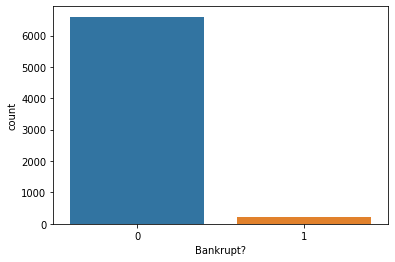

In [22]:
sns.countplot(data['Bankrupt?'])

In [23]:
X = data.drop('Bankrupt?', axis = 1)
y = data['Bankrupt?']

In [25]:
!sudo pip install imbalanced-learn

In [26]:
import imblearn

In [27]:
sm = SMOTE()
X_sm,y_sm = sm.fit_resample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


array([1, 1, 1, ..., 1, 1, 1])

## Обработка пропусков в данных:

## Построение моделей:
### Разделение выборки на обучающую и тестовую

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
data_train, data_test, data_y_train, data_y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state=1)

### Модель "Дерево решений"

In [42]:
from sklearn.tree import DecisionTreeRegressor

In [34]:
dtc = DecisionTreeRegressor(random_state=1).fit(data_train, data_y_train)
data_test_predicted_dtc = dtc.predict(data_test)

### Модель "Случайный лес"

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
RF = RandomForestRegressor(random_state=1).fit(data_train, data_y_train)
data_test_predicted_rf = RF.predict(data_test)

## Оценка качества моделей:
В качестве метрик для оценки качества моделей я использую **Mean squared error** (средняя квадратичная ошибка), как наиболее часто используемую метрику для оценки качества регрессии, и **метрику $R^2$** (коэффициент детерминации), потому что эта метрика является нормированной.

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Mean squared error - средняя квадратичная ошибка
print('Метрика MSE:\nДерево решений: {}\nСлучайный лес: {}'.format(mean_squared_error(data_y_test, data_test_predicted_dtc), mean_squared_error(data_y_test, data_test_predicted_rf)))

Метрика MSE:
Дерево решений: 7.644969145389171
Случайный лес: 3.714740789719621


In [45]:
# 4) Метрика R2 или коэффициент детерминации
print('Метрика R\u00B2:\nДерево решений: {}\nСлучайный лес: {}'.format(r2_score(data_y_test, data_test_predicted_dtc), r2_score(data_y_test, data_test_predicted_rf)))

Метрика R²:
Дерево решений: 0.809032930682008
Случайный лес: 0.9131037694525025


## Выводы о качестве построенных моделей:
Исходя из оценки качества построенных моделей можно увидеть, что модель "Случайный лес" лучше справляется с задачей по сравнению с моделью "Дерево решений", что может свидетельствовать о переобучении модели "Дерево решений".